In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as  np


%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## DATA EXPLORATION

In [ ]:

categorical_varaible=['Sex','ChestPainType', 'FastingBS','RestingECG','ExerciseAngina','ST_Slope']

In [6]:
def create_cat_hist(varaible,data= data, target= 'HeartDisease'):
    return pd.crosstab(data[varaible], data[target]).plot(kind = 'bar')
    

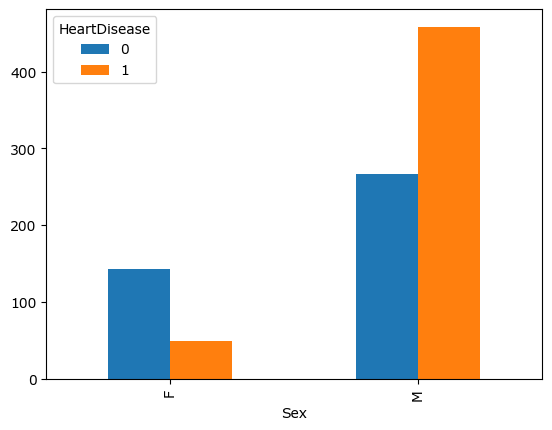

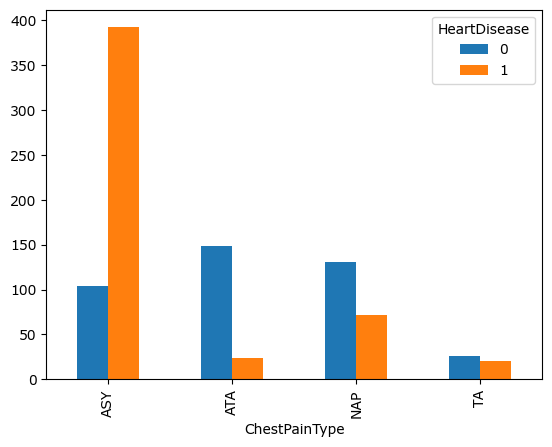

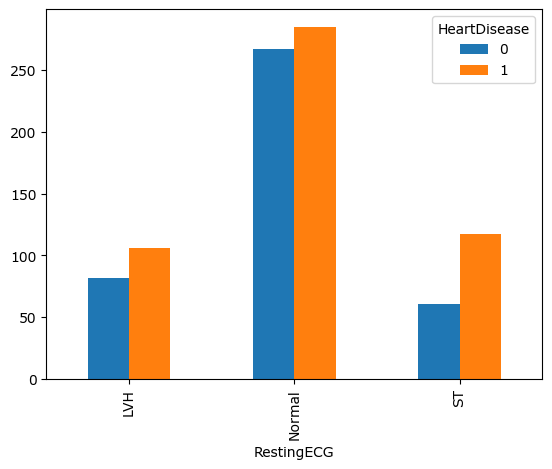

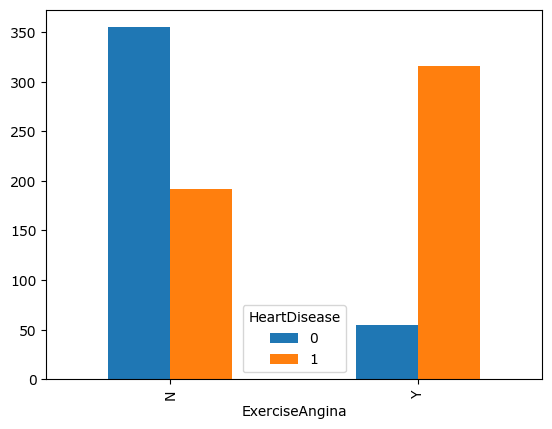

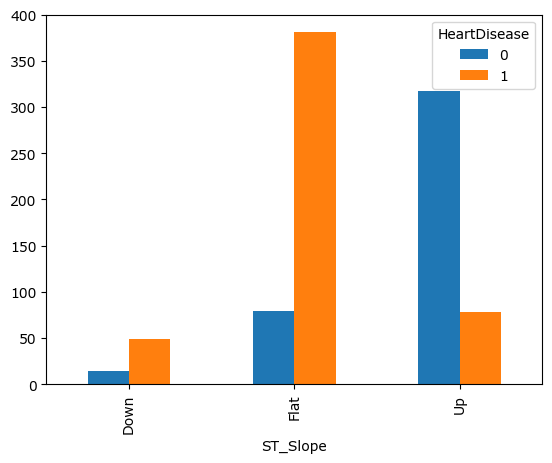

In [27]:
for cat in categorical_varaible:
    create_cat_hist(cat)

Most people tahat fasted had a likelihood of getting heart disease, which shows it is an important varaible

Most ASY, and ATA type of chestpain led to heart disease, and few people had the TA chestppain type. This is a core feature as it shows the pain type has a large play in getting heart disease or not

This shows no matter the type of restingECG you have, you still have a likelihood of having or not having heart disease. I want to remove this, but it seems people with ST, is likely to have heart disease. I am not usig this 

People with exercise angina, has more probability to have disease. This is very necessary

people with flat slope has more probability of having heart disease, andalso people with Up has less probability to have heart disease. This shows it is very importants

This shows males are more at risk in getting heart disease, making it a necessary feature. They tested mostly males

In [8]:
no_male =len(data[data['Sex'] =='M'])
no_female = len(data[data['Sex'] =='F'])
print(f"The number of males is {no_male} and the number of females is {no_female}")

The number of males is 725 and the number of females is 193


We can see they tested more males than males,which is not a good sample distribuition

In [14]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [34]:
numerical_varaible =['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

In [29]:
data.Age.nunique()

50

This almost have a gaussian distribuition so needs no transformation, well we can try to remove outliers.

<Axes: >

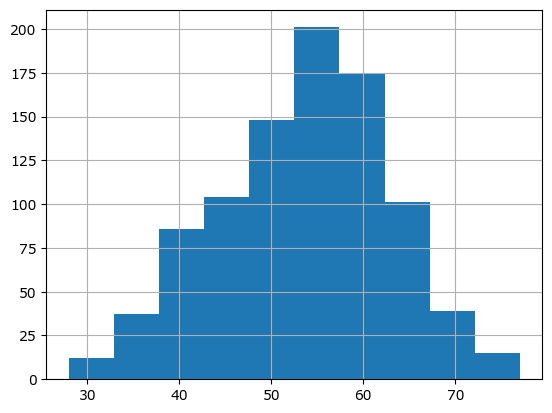

In [37]:
data.Age.hist()

<Axes: >

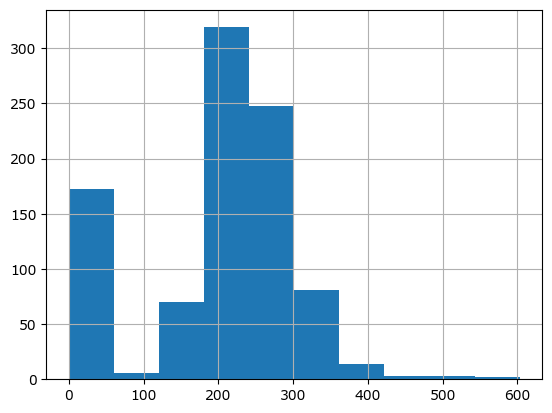

In [21]:
data.Cholesterol.hist()

This has outliers ,and for sure needs to be removed

<Axes: >

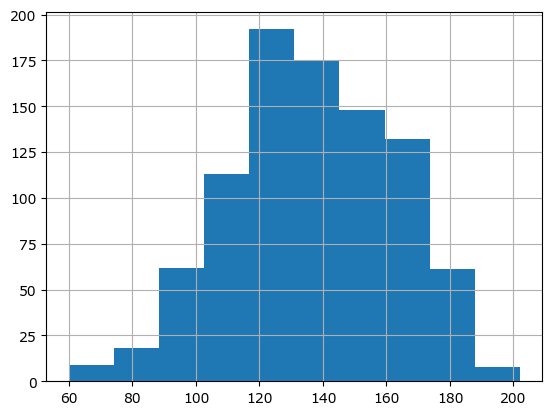

In [22]:
data.MaxHR.hist()

<Axes: >

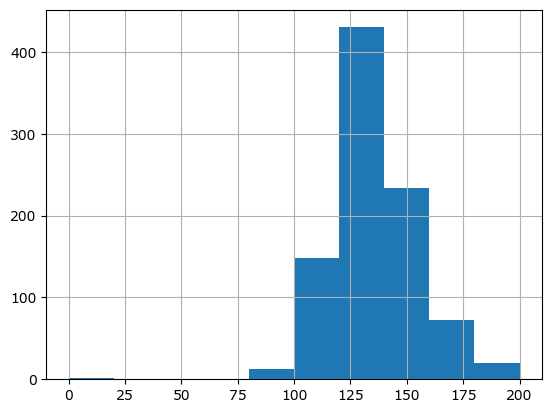

In [38]:
data.RestingBP.hist()

<Axes: >

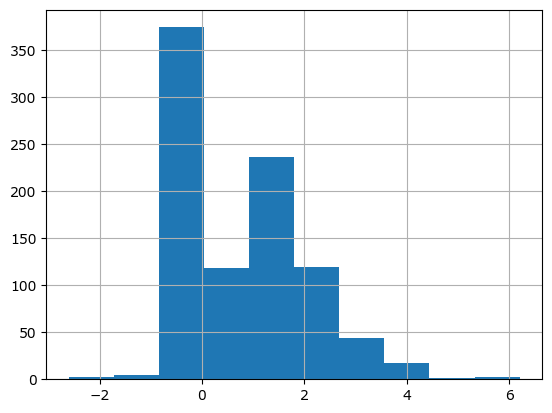

In [39]:
data.Oldpeak.hist()

This is distibuited enough
numerical_varaible =['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

Age is distibuted well

In [43]:
data[data.Oldpeak == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


PREPROCESSING DATA